In [1]:
# 兼容 pythone2,3
from __future__ import print_function

# 导入相关python库
import os
import numpy as np
import pandas as pd

#设定随机数种子
np.random.seed(36)

#使用matplotlib库画图
import matplotlib
import seaborn
import matplotlib.pyplot as plot

from sklearn import datasets


#读取数据
housing = pd.read_csv('kc_train.csv')
target=pd.read_csv('kc_train2.csv')  #销售价格
t=pd.read_csv('kc_test.csv')         #测试数据

#数据预处理
housing.info()    #查看是否有缺失值



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   20150302  9999 non-null   int64  
 1   3         9999 non-null   int64  
 2   2.25      9999 non-null   float64
 3   1670      9999 non-null   int64  
 4   6240      9999 non-null   int64  
 5   1         9999 non-null   float64
 6   8         9999 non-null   int64  
 7   1240      9999 non-null   int64  
 8   430       9999 non-null   int64  
 9   1974      9999 non-null   int64  
 10  0         9999 non-null   int64  
 11  47.6413   9999 non-null   float64
 12  -122.113  9999 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 1015.6 KB


In [2]:
#特征缩放
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()
minmax_scaler.fit(housing)   #进行内部拟合，内部参数会发生变化
scaler_housing=minmax_scaler.transform(housing)
scaler_housing=pd.DataFrame(scaler_housing,columns=housing.columns)

mm=MinMaxScaler()
mm.fit(t)
scaler_t=mm.transform(t)
scaler_t=pd.DataFrame(scaler_t,columns=t.columns)

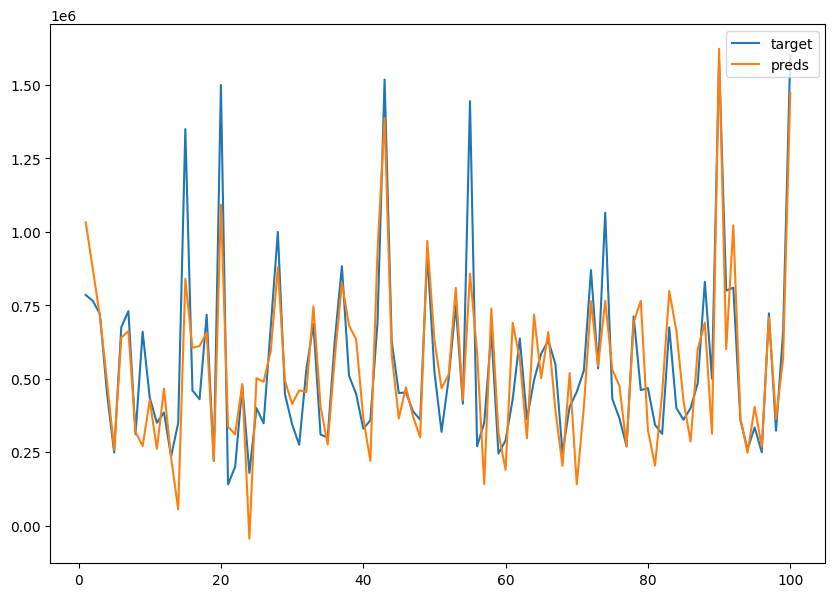

In [4]:
#选择基于梯度下降的线性回归模型
from sklearn.linear_model import LinearRegression
LR_reg=LinearRegression()
#进行拟合
LR_reg.fit(scaler_housing,target)


#使用均方误差用于评价模型好坏
from sklearn.metrics import mean_squared_error
preds=LR_reg.predict(scaler_housing)   #输入数据进行预测得到结果
mse=mean_squared_error(preds,target)   #使用均方误差来评价模型好坏，可以输出mse进行查看评价值

#绘图进行比较
plot.figure(figsize=(10,7))       #画布大小
num=100
x=np.arange(1,num+1)              #取100个点进行比较
plot.plot(x,target[:num],label='target')      #目标取值
plot.plot(x,preds[:num],label='preds')        #预测取值
plot.legend(loc='upper right')  #线条显示位置
plot.show()

In [8]:
scaler_t.columns=scaler_housing.columns #替换列名
# 输出测试数据
result = LR_reg.predict(scaler_t)
df_result = pd.DataFrame(result)
df_result.to_csv("result.csv")
